<a href="https://colab.research.google.com/github/gangerz/SkillTreePython-DataAnalysis/blob/main/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:2022-06-29
* 이름:윤예현

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [ ]:
x = np.array([3,5,5,7,8])
y = np.array([20,50,60,90,100])
x.shape, y.shape

((5,), (5,))

* 데이터 시각화

Text(0, 0.5, 'score(y)')

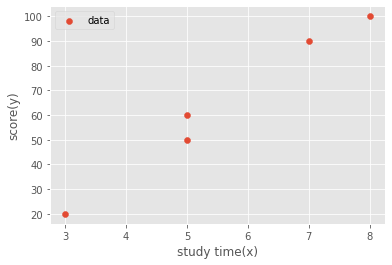

In [ ]:
# x값에 따른 y값을 나타냄

plt. scatter(x, y, label= 'data') #좌표 평면에 점
plt. legend()
plt. xlabel('study time(x)') # x축 이름
plt. ylabel('score(y)') # y축 이름

### **| step 1. 모델 구현**

$model(x;w) = wx$ 
* #x는 함수의 input 
* ;뒤에 값은 함수 안에 있는 파라미터

* 모델 정의

In [ ]:
def model(x, w=1):
  return x*w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20||
|5|50||
|5|60||
|7|90||
|8|100||

In [ ]:
print(x)
model(x)

[3 5 5 7 8]


array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
def loss(y, y_hat):
  return np.sum(np.abs(y-y_hat))/len(y)

y_hat = model(x)
error = loss(y, y_hat)
print(f'x:{x}')
print(f'y:{y}')
print(f'y hat:{y_hat}')
print(f'error:{error}')

x:[3 5 5 7 8]
y:[ 20  50  60  90 100]
y hat:[3 5 5 7 8]
error:58.4


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


*w=1일때 error = 58.4
*w=2일때 error = 52.8
*w=3일때 error = 47.2
*w=4일때 error = 41.6
*w=5일때 error = 36.0
*w=6일때 error = 30.4
*w=7일때 error = 25.2
*w=8일때 error = 20.8
*w=9일때 error = 16.4
*w=10일때 error = 12.0
*w=11일때 error = 9.6
*w=12일때 error = 7.2
*w=13일때 error = 8.8
*w=14일때 error = 14.4
*w=15일때 error = 20.0
*w=16일때 error = 25.6
*w=17일때 error = 31.2
*w=18일때 error = 36.8
*w=19일때 error = 42.4
*w=20일때 error = 48.0


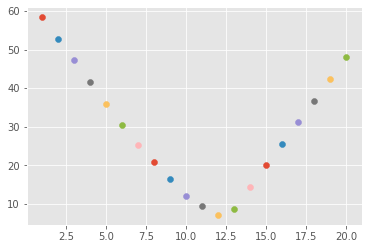

In [ ]:
for w in range(1,21):
  y_pred = model(x, w=w)
  error = loss(y, y_pred)
  print(f'*w={w}일때 error = {error}')

  # 가중치 w에 대한 오차 error 시각화

  plt.scatter(w, error) #좌표 평면에 점


### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [ ]:
w_ = 12
y_pred = model(x, w=w_)
error = loss(y, y_pred)
print(error)

7.2


* 학습 완료된 모델에 대한 예측 시각화

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[  0.           2.44897959   4.89795918   7.34693878   9.79591837
  12.24489796  14.69387755  17.14285714  19.59183673  22.04081633
  24.48979592  26.93877551  29.3877551   31.83673469  34.28571429
  36.73469388  39.18367347  41.63265306  44.08163265  46.53061224
  48.97959184  51.42857143  53.87755102  56.32653061  58.7755102
  61.2244898   63.67346939  66.12244898  68.57142857  71.0204

Text(0, 0.5, 'score(y)')

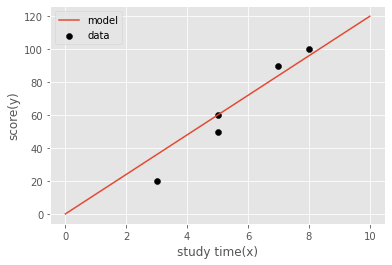

In [ ]:
test_x = np.linspace(0,10,50)
print(test_x)
test_y_pred = model(test_x, w=w_)
print(test_y_pred)
# x값에 따른 y값을 나타냄

plt. scatter(x, y, label= 'data',c ='k')
plt. plot(test_x, test_y_pred, label = 'model')
plt. legend()
plt. xlabel('study time(x)') 
plt. ylabel('score(y)') 

* 공부시간이 6시간일 때 예상 점수는?


In [ ]:
model(6, w=w_)


72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [ ]:
x_test = np.array([1,2,5,6,7])
y_test = np.array([5,15,55,80,85])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [ ]:
loss(y_test, model(x_test,w=w_))

6.0

* 학습 완료된 모델에 테스트 데이터 예측 시각화

Text(0, 0.5, 'score(y)')

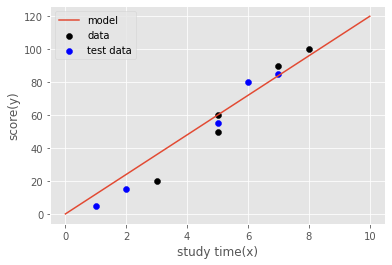

In [ ]:
# 데이터
plt. scatter(x, y, label= 'data',c ='k')
# 모델
plt. plot(test_x, test_y_pred, label = 'model')
#테스트 데이터
plt. scatter(x_test, y_test, label = 'test data', c='b')
plt. legend()
plt. xlabel('study time(x)') 
plt. ylabel('score(y)') 

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [ ]:

x = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
y = np.array([20,80,60,90,100])
print(x,x.shape)
print(y,y.shape)


[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]] (5, 2)
[ 20  80  60  90 100] (5,)


* 데이터 시각화

Text(0.5, 0, 'score')

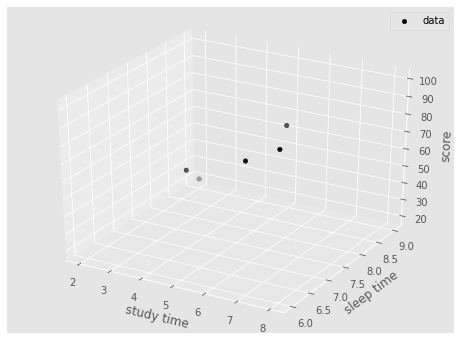

In [ ]:

fig = plt.figure(figsize=(8,6)) #그림 전체 사이즈 설정
ax = plt.axes(projection='3d') #좌표를 3dㅀ 설정
# 공부시간(x_*1), 수면시간 (x_*2), 성적 (y)
study_time = x[:,0]
sleep_time = x[:,1]
ax.scatter3D(study_time, sleep_time,y, c='k', label = 'data')
plt.legend()
ax.set_xlabel('study time')
ax.set_ylabel('sleep time')
ax.set_zlabel('score')

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [ ]:
def model2(x_vec, w_vec=np.array([1,1])):
  return np.dot(x_vec, w_vec)
x_vec = np.array([5,10])
model2(x_vec)

15

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

In [ ]:
print(x)
model2(x)

[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]]


array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
y_pred =model2(x)
print(y_pred)
loss(y,y_pred)

[11 14 11 13 14]


57.4

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [ ]:
w1_range= np.arange(31)
w2_range= np.arange(-10,11)
print(w1_range)
print(w2_range)
#(w1,w2) 순서쌍을 구하기
W1,W2 = np.meshgrid(w1_range,w2_range)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [ ]:
errors =[]
for w1,w2 in zip(W1.flatten(),W2.flatten()):
  print(w1,w2)
  y_pred =model2(x,w_vec = np.array([w1,w2]))
  error = loss(y,y_pred)
  print(f'w1={w1}, w2={w2}일때 예측값은{y_pred}')
  errors.append(error)
print(errors)

0 -10
w1=0, w2=-10일때 예측값은[-90 -80 -70 -60 -60]
1 -10
w1=1, w2=-10일때 예측값은[-88 -74 -66 -53 -52]
2 -10
w1=2, w2=-10일때 예측값은[-86 -68 -62 -46 -44]
3 -10
w1=3, w2=-10일때 예측값은[-84 -62 -58 -39 -36]
4 -10
w1=4, w2=-10일때 예측값은[-82 -56 -54 -32 -28]
5 -10
w1=5, w2=-10일때 예측값은[-80 -50 -50 -25 -20]
6 -10
w1=6, w2=-10일때 예측값은[-78 -44 -46 -18 -12]
7 -10
w1=7, w2=-10일때 예측값은[-76 -38 -42 -11  -4]
8 -10
w1=8, w2=-10일때 예측값은[-74 -32 -38  -4   4]
9 -10
w1=9, w2=-10일때 예측값은[-72 -26 -34   3  12]
10 -10
w1=10, w2=-10일때 예측값은[-70 -20 -30  10  20]
11 -10
w1=11, w2=-10일때 예측값은[-68 -14 -26  17  28]
12 -10
w1=12, w2=-10일때 예측값은[-66  -8 -22  24  36]
13 -10
w1=13, w2=-10일때 예측값은[-64  -2 -18  31  44]
14 -10
w1=14, w2=-10일때 예측값은[-62   4 -14  38  52]
15 -10
w1=15, w2=-10일때 예측값은[-60  10 -10  45  60]
16 -10
w1=16, w2=-10일때 예측값은[-58  16  -6  52  68]
17 -10
w1=17, w2=-10일때 예측값은[-56  22  -2  59  76]
18 -10
w1=18, w2=-10일때 예측값은[-54  28   2  66  84]
19 -10
w1=19, w2=-10일때 예측값은[-52  34   6  73  92]
20 -10
w1=20, w2=-10일때 예측값은[-50  40  10 

* 3d플롯으로 시각화

In [ ]:
W1.shape

(21, 31)

No handles with labels found to put in legend.


Text(0.5, 0, 'error')

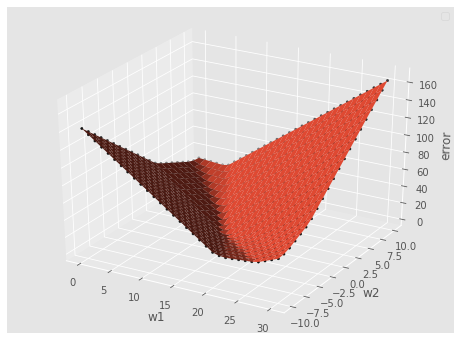

In [ ]:
fig = plt.figure(figsize=(8,6)) 
ax = plt.axes(projection='3d') 

# w1,w2에 대한 error
ax.scatter3D(W1.flatten(), W2.flatten(),errors,marker='.', c='k')
surf = ax.plot_surface(W1,W2,np.array(errors).reshape(21,31))

plt.legend()
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error')

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [ ]:
w_vec_ = np.array([14,-1])
y_pred = model2(x,w_vec = w_vec_)
print(y)
print(y_pred)

[ 20  80  60  90 100]
[ 19  76  49  92 106]


* 학습 완료된 모델의 최종 손실 계산

In [ ]:
loss(y,y_pred)

4.8

* 학습 완료된 모델에 대한 예측 시각화

Text(0.5, 0, 'score')

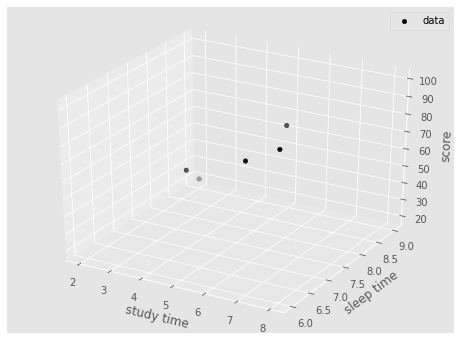

In [ ]:

fig = plt.figure(figsize=(8,6)) #그림 전체 사이즈 설정
ax = plt.axes(projection='3d') #좌표를 3dㅀ 설정
# 공부시간(x_*1), 수면시간 (x_*2), 성적 (y)
study_time = x[:,0]
sleep_time = x[:,1]
ax.scatter3D(study_time, sleep_time,y, c='k', label = 'data')




study_time_range = np.linspace(2,8,100)
sleep_time_range = np.linspace(6,9,100)
STUDY, SLEEP = np.meshgrid(study_time_range, sleep_time_range)
ax.plot_surface(STUDY, SLEEP,model2())


plt.legend()
ax.set_xlabel('study time')
ax.set_ylabel('sleep time')
ax.set_zlabel('score')

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [ ]:
model2(np.array([6, 5]),w_vec_)

79

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [ ]:
x_test = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
y_test = np.array([15,25,60,90,95])
print(x,x.shape)
print(y,y.shape)

[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]] (5, 2)
[ 20  80  60  90 100] (5,)


* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [ ]:
y_test_pred = model2(x_test,w_vec_)
error= loss(y_test,y_test_pred)
print(error)

16.8


* 학습 완료된 모델에 테스트 데이터 예측 시각화

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [ ]:
class Model():
  def __init__(self):
    self.w = 5
  def model(self,x):
    return x*self.w

  def predict(self,x):
    y_pred = self.model(x)
    return y_pred

  def loss(self,y,y_hat):
    return np.sum(np.abs(y-y_hat))/len(y)

  def validation(self, x, y):
    y_pred = self.model(x)
    error = self.loss(y, y_pred)
    return error

  def plot(self, x, y):
    plt.scatter(x,y , label='data', c='k') #좌표 평면에 점 찍기
    plt.plot(x,self.predict(x),label='model') #모델의 직선 그리기
    plt.legend()
    plt.xlabel('study time(x)')
    plt.ylabel('score(y)')
    plt.title(f'w:{self.w}')
    plt.show()

  def fit(self, x,y, w_min, w_max):
    min_error = 1000000
    for w in range(w_min,w_max):
      self.w = w

      y_pred =self.model(x)
      error =self.loss(y, y_pred)

#ㅈ구한 오차가 이때까지 오차중 가장 작으면

      if min_error >= error:
        min_error = error#최소오차 업데이트
        w_ideal = w #w도 업데이트 하겠다
        print(f'*w={w}일때 error = {error}')

      else:# 지금 구한 오차ㅑ가 커지기 시작하면,
       print('학습 종료')
       self.w = w_ideal
       break

In [ ]:
x = np.array([3,5,5,7,8])
y = np.array([20,50,60,90,100])
x.shape, y.shape

((5,), (5,))

모델의 예측 [15 25 25 35 40]
평가 결과(오차 36.0


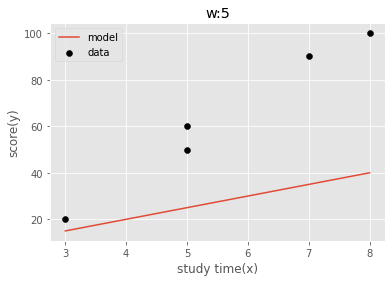

*w=0일때 error = 64.0
*w=1일때 error = 58.4
*w=2일때 error = 52.8
*w=3일때 error = 47.2
*w=4일때 error = 41.6
*w=5일때 error = 36.0
*w=6일때 error = 30.4
*w=7일때 error = 25.2
*w=8일때 error = 20.8
*w=9일때 error = 16.4
*w=10일때 error = 12.0
*w=11일때 error = 9.6
*w=12일때 error = 7.2
학습 종료


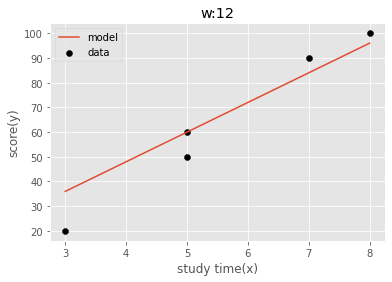

In [ ]:
model = Model()
print('모델의 예측', model.predict(x))
print('평가 결과(오차', model.validation(x,y))
model.plot(x,y)
model.fit(x,y,w_min=0,w_max=20)
model.plot(x,y)

In [ ]:
model.w

12